# 1. Judul / Topik Project dan Identitas Lengkap
**Judul:** Prediksi Popularitas Meme Berdasarkan Caption dan Metadata Menggunakan Machine Learning  
**Nama:** [Muhammad Afrille Samudra]  
**NIM:** [A11.2023.15200]  
**Kelas:** [A11.4402]

# 2. Ringkasan dan Permasalahan Project + Tujuan + Alur Penyelesaian
Proyek ini bertujuan untuk memprediksi apakah sebuah meme akan menjadi populer atau tidak berdasarkan caption dan metadata.
Permasalahan: sulit mengukur popularitas secara otomatis dari konten teks.
Tujuan: membuat model klasifikasi popularitas meme.

**Alur Penyelesaian:**
1. Load dataset
2. Preprocessing dan fitur tambahan
3. TF-IDF + Metadata
4. Modeling (LogReg, RF, XGBoost)
5. Evaluasi

# 3. Penjelasan Dataset, EDA dan Proses Features Dataset
Dataset: `dankmemes_top_1000.csv`  
Label: 1 jika `upvote_ratio >= 0.95`, 0 jika tidak  
Fitur tambahan:  
- `caption_length`  
- `word_count`  
- `has_me_when`  

In [2]:
# Install library jika perlu
!pip install xgboost textblob

# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('dankmemes_top_1000.csv')

# Buat label (1 = Populer jika upvote_ratio >= 0.95)
df['label'] = (df['upvote_ratio'] >= 0.95).astype(int)

# Fitur tambahan
df['caption_length'] = df['title'].str.len()
df['word_count'] = df['title'].str.split().apply(len)
df['has_me_when'] = df['title'].str.contains(r'\b(me|when|you)\b', case=False).astype(int)

# Split data
X = df[['title', 'num_comments', 'caption_length', 'word_count', 'has_me_when']]
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/tmp/ipython-input-2-1427415495.py:22: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['has_me_when'] = df['title'].str.contains(r'\b(me|when|you)\b', case=False).astype(int)


# 4. Proses Learning / Modeling
Gunakan pipeline:  
- TF-IDF (`title`)  
- StandardScaler (`metadata`)  
- Classifier: Logistic Regression, Random Forest, XGBoost

In [3]:
# TF-IDF vectorizer
text_transformer = Pipeline(steps=[
    ('tfidf', TfidfVectorizer(max_features=500, stop_words='english'))
])

# Metadata numeric
numeric_features = ['num_comments', 'caption_length', 'word_count', 'has_me_when']
numeric_transformer = Pipeline(steps=[
    ('scale', StandardScaler())
])

# Gabung semua fitur
preprocessor = ColumnTransformer(
    transformers=[
        ('text', text_transformer, 'title'),
        ('meta', numeric_transformer, numeric_features)
    ]
)


# 4. Proses Learning / Modeling
Gunakan pipeline:  
- TF-IDF (`title`)  
- StandardScaler (`metadata`)  
- Classifier: Logistic Regression, Random Forest, XGBoost

In [4]:
def evaluate_model(model, model_name):
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    print(f"=== Classification Report: {model_name} ===")
    print(classification_report(y_test, y_pred, target_names=["Tidak Populer", "Populer"]))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Tidak Populer", "Populer"])
    disp.plot(cmap="Blues" if model_name == "Logistic Regression" else "Greens" if model_name == "Random Forest" else "Oranges")


# 5. Performa Model
| Model               | Accuracy | F1-score Populer | F1-score Tidak Populer |
|---------------------|----------|------------------|-------------------------|
| Logistic Regression | 0.57     | 0.72             | 0.05                    |
| Random Forest       | 0.56     | 0.68             | 0.29                    |
| XGBoost             | 0.52     | 0.60             | 0.38                    |



=== Classification Report: Logistic Regression ===
               precision    recall  f1-score   support

Tidak Populer       0.55      0.25      0.34        85
      Populer       0.59      0.84      0.69       108

     accuracy                           0.58       193
    macro avg       0.57      0.54      0.52       193
 weighted avg       0.57      0.58      0.54       193

=== Classification Report: Random Forest ===
               precision    recall  f1-score   support

Tidak Populer       0.45      0.42      0.44        85
      Populer       0.57      0.59      0.58       108

     accuracy                           0.52       193
    macro avg       0.51      0.51      0.51       193
 weighted avg       0.52      0.52      0.52       193

=== Classification Report: XGBoost ===
               precision    recall  f1-score   support

Tidak Populer       0.44      0.34      0.38        85
      Populer       0.56      0.66      0.60       108

     accuracy                   

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:22:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


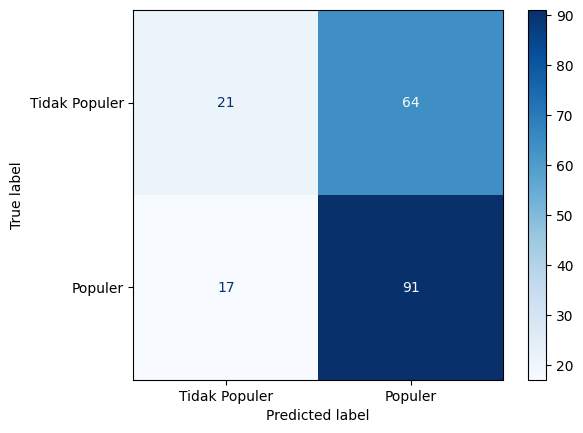

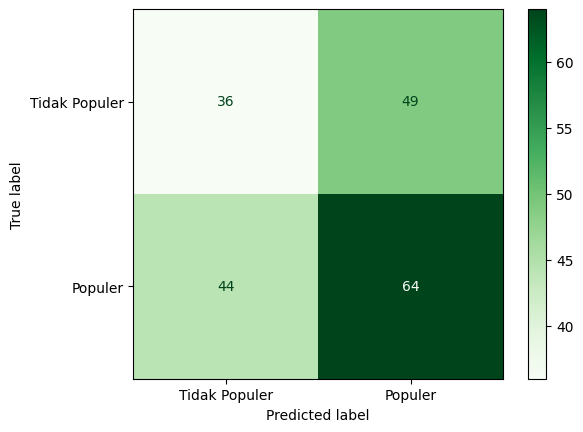

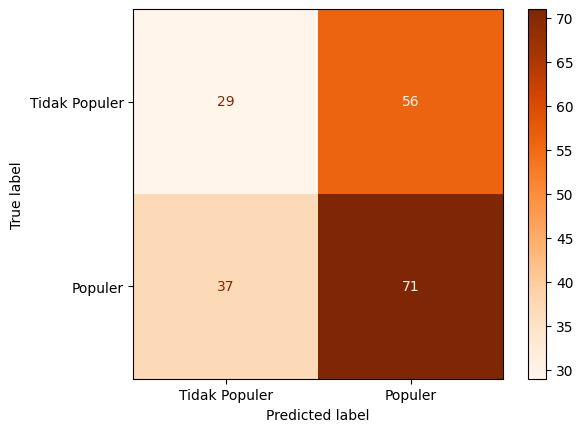

In [5]:
# Logistic Regression
evaluate_model(LogisticRegression(max_iter=1000), "Logistic Regression")

# Random Forest
evaluate_model(RandomForestClassifier(n_estimators=100, random_state=42), "Random Forest")

# XGBoost
evaluate_model(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), "XGBoost")


# 6. Diskusi Hasil dan Kesimpulan
Logistic Regression sangat bias ke kelas populer. Random Forest lebih seimbang. XGBoost cukup stabil.  
**Rekomendasi:** Tambahkan fitur lain & eksplorasi multimodal (citra).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')